## Show Ground-Truth Neighbors

743
39614
42808
44123
3157
43891


<IPython.core.display.Javascript object>


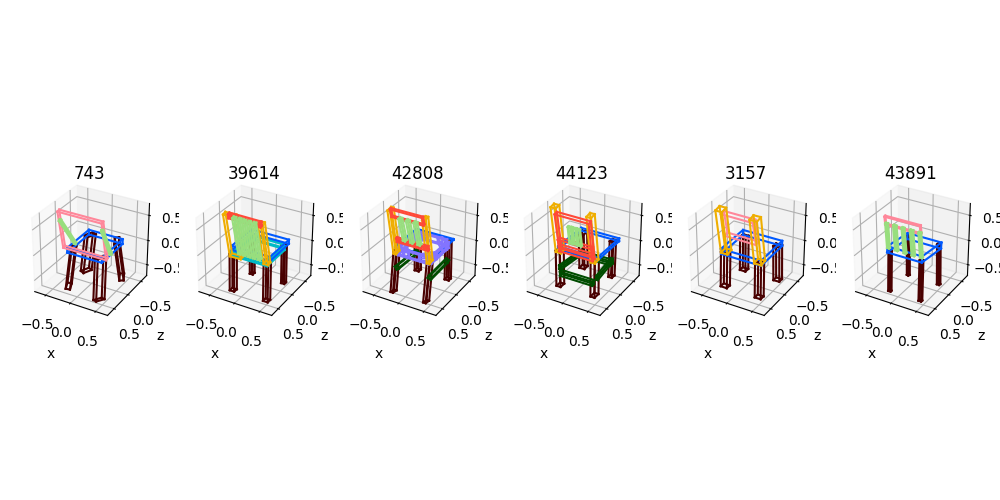

In [7]:
%matplotlib notebook

import os
import matplotlib
from data import PartNetDataset, PartNetShapeDiffDataset
from vis_utils import draw_partnet_objects

matplotlib.pyplot.ion()

metric = 'cd'
split = 'test_no_other_less_than_10_parts'

data_dir = '../data/partnetdata/chair_hier'
diff_dir = os.path.join(data_dir, 'neighbors_'+metric, split)
object_list = os.path.join(data_dir, split+'.txt')

# read all data
with open(object_list, 'r') as f:
    object_names = [item.rstrip() for item in f.readlines()]

# visualize one data
obj_idx = 1
object_name = object_names[obj_idx]
print(object_name)
orig_obj = PartNetDataset.load_object(os.path.join(data_dir, object_name+'.json'))

names = [object_name]; objs = [orig_obj];

neighbor_objs = []
fn = os.path.join(diff_dir, object_name+'.npy')
neighbor_names = PartNetShapeDiffDataset.load_neighbors(fn=fn, topk=5, name=object_name, self_is_neighbor=False)
for neighbor_name in neighbor_names:
    names.append(neighbor_name)
    print(neighbor_name)
    objs.append(PartNetDataset.load_object(os.path.join(data_dir, neighbor_name+'.json')))
    
draw_partnet_objects(objects=objs, object_names=names, 
                     figsize=(10, 5), leafs_only=True, visu_edges=False,
                     sem_colors_filename='../stats/semantics_colors/Chair.txt')
